# Neural Network implementation from Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generating dataset

In [2]:
X = np.vstack([(np.random.rand(10,2)*5), (np.random.rand(10,2)*10)])
y = np.hstack([[0]*10, [1]*10])

dataset = pd.DataFrame(X, columns = ('X1', 'X2'))
dataset['Y'] = y

In [3]:
dataset

,X1,X2,Y
0,4.117635,3.485070,0
1,3.152055,4.672863,0
2,0.733723,1.219021,0
3,1.651342,2.789319,0
4,1.211689,3.838208,0
5,0.324588,2.287793,0
6,4.954522,1.294151,0
7,4.078573,2.830370,0
8,4.339834,0.321010,0
9,1.111642,1.122509,0


In [4]:
?np.random.rand

In [5]:
?np.vstack

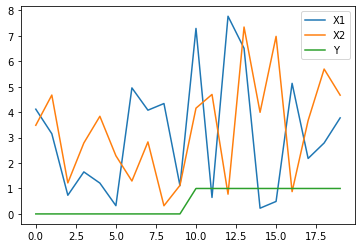

In [6]:
# Plotting the dataset

plt.plot(dataset, label='inline label')
plt.legend(['X1', 'X2', 'Y'])
plt.show()

In [7]:
Z = np.zeros((20,2))
for i in range(20):
    Z[i,y[i]] = 1 
    
"""
ith row and y[i]th column (which is 0 for 1st 10 rows and 1 for other 10),
generating a one hot encoded numpy ndarray
"""
    
Z

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

## Initialising Weights and Biases

creating a 2 layer neural network

Wi_1 and Bi_1 are weights and bias for the first layer
similarly for Wi_2 and Bi_2

In [41]:
Wi_1 = np.random.randn(3,2)
Bi_1 = np.random.randn(3)
Wi_2 = np.random.randn(3,2)
Bi_2 = np.random.randn(2)

# randn generates samples from a normal distribution.
# 3 neurons in 1st layer, 2 neurons in 2nd layer

In [42]:
Wi_1

array([[-0.86976178, -1.28149388],
       [ 0.59700122, -0.32283959],
       [ 0.22626241, -0.6156147 ]])

In [43]:
Bi_1

array([-0.55728988,  0.72440757,  0.38091541])

In [44]:
Wi_2

array([[-1.4192203 , -1.01198728],
       [-0.528805  , -0.40055592],
       [ 0.17224297,  1.08783243]])

In [45]:
Bi_2

array([0.07299734, 0.66301491])

In [46]:
X

array([[4.11763467, 3.48506959],
       [3.15205455, 4.67286325],
       [0.73372274, 1.21902084],
       [1.65134195, 2.78931944],
       [1.21168871, 3.83820801],
       [0.32458839, 2.28779297],
       [4.9545223 , 1.29415144],
       [4.07857285, 2.8303704 ],
       [4.33983444, 0.32100972],
       [1.1116419 , 1.12250879],
       [7.29261958, 4.15773609],
       [0.64774613, 4.69722462],
       [7.77168965, 0.77583959],
       [6.51207528, 7.34741756],
       [0.22499293, 3.99437847],
       [0.49038713, 6.98040011],
       [5.13350993, 0.87667558],
       [2.18006949, 3.67333314],
       [2.78960192, 5.69568549],
       [3.77600848, 4.66881562]])

In [47]:
X.dot(Wi_1.T)
# this would be a step in forward propagation function
# Bias is also added to this, and finally activation function is applied on it.

array([[ -8.04745661,   1.33311446,  -1.21379413],
       [ -8.72978224,   0.37319513,  -2.16349185],
       [ -2.20033174,   0.04448518,  -0.58443327],
       [ -5.01076991,   0.0853504 ,  -1.34350944],
       [ -5.97252061,  -0.51574588,  -2.08869766],
       [ -3.21410728,  -0.54481049,  -1.33495683],
       [ -5.96770127,   2.54005252,   0.32432349],
       [ -7.17448913,   1.52115732,  -0.81958991],
       [ -4.18599411,   2.48725179,   0.78432308],
       [ -2.40535178,   0.30126129,  -0.43951014],
       [-11.67095514,   3.01142094,  -0.90951779],
       [ -6.58284945,  -1.12974486,  -2.74511992],
       [ -7.7537523 ,   4.38923644,   1.28082295],
       [-15.07962484,   1.51567957,  -3.04974042],
       [ -5.31446183,  -1.15522247,  -2.40809065],
       [ -9.37186003,  -1.96078782,  -4.18628073],
       [ -5.58838512,   2.78168609,   0.62182594],
       [ -6.60349506,   0.11560676,  -1.7680901 ],
       [ -9.72527525,  -0.17339705,  -2.87516566],
       [ -9.26728651,   0.74700

# Defining Forward Propagation Function

In [48]:
def forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2):
    # first layer
    M = 1/(1+np.exp(-(X.dot(Wi_1.T) + Bi_1))) # sigmoid function applied.
    # second layer
    A = M.dot(Wi_2) + Bi_2
    expA = np.exp(A)
    Y = expA/expA.sum(axis = 1, keepdims = True) # Softmax function applied.
    return Y, M

In [49]:
forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)

(array([[0.27264014, 0.72735986],
        [0.30617791, 0.69382209],
        [0.24725385, 0.75274615],
        [0.28224481, 0.71775519],
        [0.3096192 , 0.6903808 ],
        [0.28421497, 0.71578503],
        [0.20965766, 0.79034234],
        [0.25633019, 0.74366981],
        [0.19548522, 0.80451478],
        [0.24070516, 0.75929484],
        [0.25830049, 0.74169951],
        [0.32731977, 0.67268023],
        [0.1843534 , 0.8156466 ],
        [0.31749814, 0.68250186],
        [0.32120519, 0.67879481],
        [0.34551075, 0.65448925],
        [0.20016827, 0.79983173],
        [0.29673373, 0.70326627],
        [0.32273878, 0.67726122],
        [0.30085527, 0.69914473]]),
 array([[1.83200440e-04, 8.86705474e-01, 3.03036724e-01],
        [9.26052497e-05, 7.49810653e-01, 1.43985288e-01],
        [5.96576501e-02, 6.83281324e-01, 4.49295428e-01],
        [3.80335999e-03, 6.92057926e-01, 2.76359128e-01],
        [1.45715597e-03, 5.51976969e-01, 1.53451589e-01],
        [2.25018877e-02, 5.4

## Backpropagation by Differentiating or Gradient Descent

In [ ]:
# Returns gradient for Weight_2
def diff_Wi_1(H, Z, Y):
    return H.T.dot(Z - Y)

# H = Hidden Layer
# Z = Predicted Values
# Y = Actual values